In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
sample=x_train[0]
sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

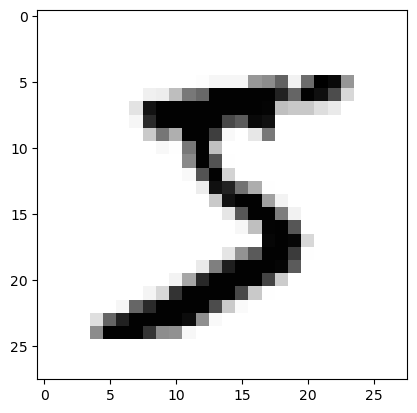

In [9]:
plt.imshow(sample,cmap="Greys")

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train.shape

(60000,)

In [12]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_example=to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [18]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [19]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [27]:
sample.max()

255

In [28]:
sample.min()

0

In [33]:
(x_train/255)[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
x_train=x_train/255

In [35]:
x_test=x_test/255

In [38]:
x_train.max()

1.0

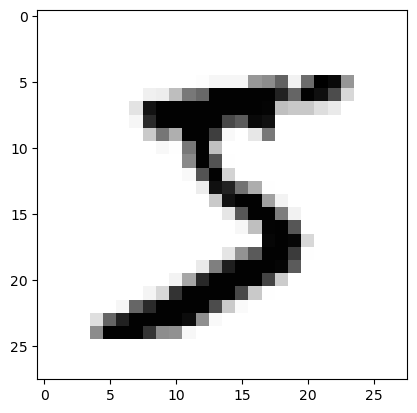

In [40]:
plt.imshow(x_train[0],cmap="Greys")

In [41]:
x_train=x_train.reshape(60000,28,28,1)

In [42]:
x_train.shape

(60000, 28, 28, 1)

In [43]:
x_test=x_test.reshape(10000,28,28,1)

In [45]:
x_test.shape

(10000, 28, 28, 1)

In [46]:
from tensorflow.keras.models import Sequential

In [47]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [81]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

#output layer multiclass mutually exclusive
model.add(Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

C:\Users\kavin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [84]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9217 - loss: 0.2675 - val_accuracy: 0.9828 - val_loss: 0.0522
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9848 - loss: 0.0480 - val_accuracy: 0.9869 - val_loss: 0.0411
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9871 - val_loss: 0.0400
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9885 - val_loss: 0.0355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9876 - val_loss: 0.0410


In [85]:
losses=pd.DataFrame(model.history.history)

In [86]:
losses[['loss','val_loss']]

,loss,val_loss
0,0.131420,0.052221
1,0.046773,0.041058
2,0.030329,0.039977
3,0.021162,0.035450
4,0.013945,0.040976


In [87]:
losses[['accuracy','val_accuracy']]

,accuracy,val_accuracy
0,0.961017,0.9828
1,0.985633,0.9869
2,0.990783,0.9871
3,0.993167,0.9885
4,0.995583,0.9876


<Axes: >

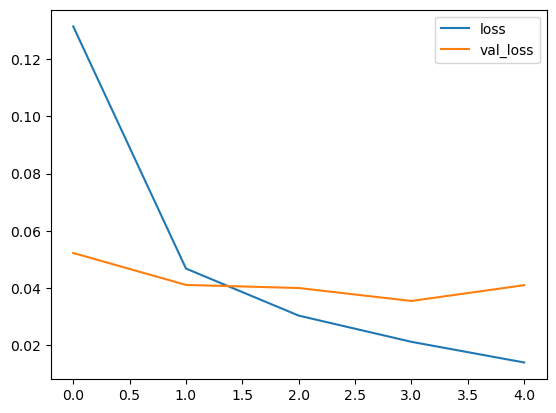

In [88]:
losses[['loss','val_loss']].plot()

<Axes: >

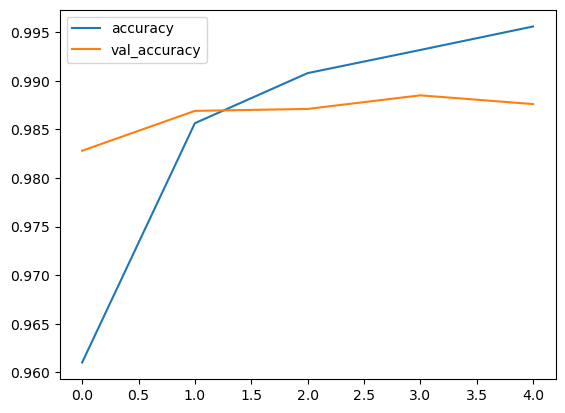

In [89]:
losses[['accuracy','val_accuracy']].plot()

In [118]:
model.metrics_names

['loss', 'compile_metrics']

In [119]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.040975723415613174, 0.9876000285148621]

In [120]:
#accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9876 - val_loss: 0.0410

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [131]:
predictions.shape

(10000, 10)

In [132]:
predictions[0]

array([2.1831668e-12, 2.7185506e-12, 2.6437089e-08, 1.2507610e-07,
       1.6425074e-10, 5.0583305e-11, 2.3114305e-17, 9.9999988e-01,
       1.3525840e-08, 1.5807458e-08], dtype=float32)

In [133]:
predictions = np.argmax(predictions, axis=1)

In [134]:
predictions.shape

(10000,)

In [135]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [136]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [137]:
confusion_matrix(y_test,predictions)

array([[ 973,    1,    0,    0,    0,    1,    1,    1,    3,    0],
       [   0, 1131,    1,    0,    0,    1,    0,    2,    0,    0],
       [   2,    2, 1009,    0,    1,    0,    1,   15,    2,    0],
       [   0,    0,    1,  998,    0,    2,    0,    7,    2,    0],
       [   0,    0,    2,    0,  971,    0,    2,    0,    0,    7],
       [   2,    0,    0,    8,    0,  877,    3,    1,    1,    0],
       [   3,    3,    0,    0,    2,    1,  946,    0,    3,    0],
       [   0,    0,    2,    1,    0,    0,    0, 1024,    0,    1],
       [   3,    0,    2,    1,    0,    0,    0,    4,  962,    2],
       [   0,    1,    0,    1,    6,    3,    0,   10,    3,  985]],
      dtype=int64)

In [139]:
import seaborn as sns

<Axes: >

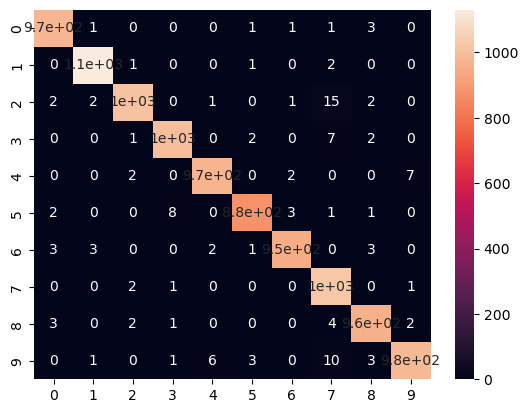

In [141]:
# sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [152]:
new_image=x_test[0].reshape(28,28)

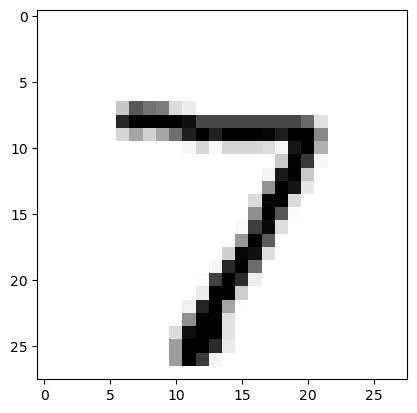

In [154]:
plt.imshow(new_image,cmap="Greys")

In [156]:
model.predict(x_test[0].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[2.1831627e-12, 2.7185454e-12, 2.6437039e-08, 1.2507574e-07,
        1.6425043e-10, 5.0583208e-11, 2.3114217e-17, 9.9999988e-01,
        1.3525840e-08, 1.5807428e-08]], dtype=float32)

In [157]:
np.argmax(model.predict(x_test[0].reshape(1,28,28,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


7